In [37]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [38]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS = 3
EPOCHS = 35

In [39]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [40]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

# VIsualiztion

(32, 256, 256, 3)
[2 1 1 0 0 0 2 1 1 1 0 2 1 2 0 0 0 1 1 0 1 0 1 1 0 1 0 1 1 0 1 0]


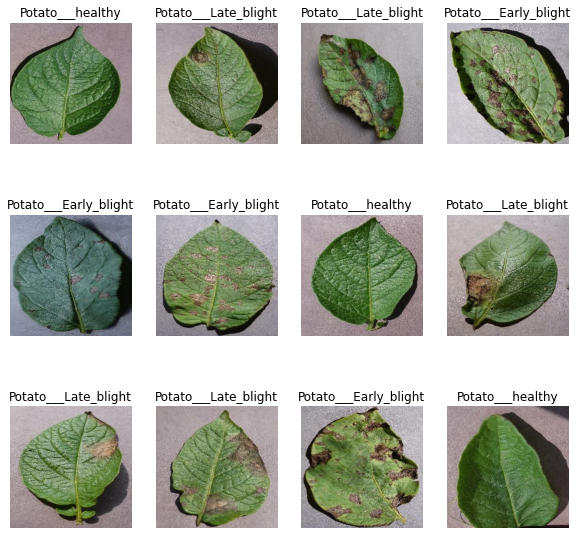

In [41]:
plt.figure(figsize = (10, 10))
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())
    for i in range(12):
        ax = plt.subplot(3, 4, i+1)

        plt.imshow(image_batch[i].numpy().astype("uint8"))

        plt.title(class_names[labels_batch[i]])

        plt.axis("off")

# training and testing

80 = training
10 = validation
10 = test

In [42]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [43]:
train_ds = dataset.take(54)
len(train_ds)

54

In [44]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [45]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [46]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [47]:
def get_dataset_partitions_tf(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size = 10000):

    assert(train_split+test_split+val_split) == 1

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)

    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [48]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [49]:
len(train_ds)

54

In [50]:
len(val_ds)

6

In [51]:
len(test_ds)

8

In [52]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [53]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].numpy()/255)

[[[0.4862745  0.47843137 0.5294118 ]
  [0.5411765  0.53333336 0.58431375]
  [0.47058824 0.4627451  0.5137255 ]
  ...
  [0.44705883 0.43529412 0.47843137]
  [0.47843137 0.46666667 0.50980395]
  [0.45490196 0.44313726 0.4862745 ]]

 [[0.53333336 0.5254902  0.5764706 ]
  [0.5529412  0.54509807 0.59607846]
  [0.46666667 0.45882353 0.50980395]
  ...
  [0.44313726 0.43137255 0.4745098 ]
  [0.48235294 0.47058824 0.5137255 ]
  [0.46666667 0.45490196 0.49803922]]

 [[0.4392157  0.43137255 0.48235294]
  [0.49411765 0.4862745  0.5372549 ]
  [0.4509804  0.44313726 0.49411765]
  ...
  [0.4392157  0.42745098 0.47058824]
  [0.48235294 0.47058824 0.5137255 ]
  [0.45882353 0.44705883 0.49019608]]

 ...

 [[0.77254903 0.7647059  0.80784315]
  [0.8        0.7921569  0.8352941 ]
  [0.7294118  0.72156864 0.7647059 ]
  ...
  [0.62352943 0.6156863  0.6666667 ]
  [0.6901961  0.68235296 0.73333335]
  [0.70980394 0.7019608  0.7529412 ]]

 [[0.77254903 0.7647059  0.80784315]
  [0.7529412  0.74509805 0.7882353 ]


In [54]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [55]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [56]:
IMAGE_SIZE

256

In [57]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape = input_shape)

In [58]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential_4 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_6 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (32, 127, 127, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [59]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [60]:
history = model.fit(
    train_ds,
    batch_size = BATCH_SIZE,
    validation_data = val_ds,
    verbose = 1,
    epochs = EPOCHS
)

Epoch 1/35
54/54 [==============================] - 127s 2s/step - loss: 0.9045 - accuracy: 0.4878 - val_loss: 0.8566 - val_accuracy: 0.5312
Epoch 2/35
54/54 [==============================] - 117s 2s/step - loss: 0.7003 - accuracy: 0.6551 - val_loss: 0.6153 - val_accuracy: 0.7604
Epoch 3/35
54/54 [==============================] - 112s 2s/step - loss: 0.5498 - accuracy: 0.7517 - val_loss: 0.4261 - val_accuracy: 0.8333
Epoch 4/35
54/54 [==============================] - 111s 2s/step - loss: 0.3312 - accuracy: 0.8628 - val_loss: 0.3308 - val_accuracy: 0.8646
Epoch 5/35
54/54 [==============================] - 111s 2s/step - loss: 0.2757 - accuracy: 0.8843 - val_loss: 0.5618 - val_accuracy: 0.7604
Epoch 6/35
54/54 [==============================] - 112s 2s/step - loss: 0.2569 - accuracy: 0.8987 - val_loss: 0.4665 - val_accuracy: 0.8333
Epoch 7/35
54/54 [==============================] - 111s 2s/step - loss: 0.2112 - accuracy: 0.9213 - val_loss: 0.2490 - val_accuracy: 0.8802
Epoch 8/35
54

In [61]:
len(test_ds)

8

In [62]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 8s 503ms/step - loss: 0.2271 - accuracy: 0.9453


In [63]:
scores

[0.2271001636981964, 0.9453125]

### Plotting the Accuracy and Loss Curves

In [64]:
history

In [65]:
history.params

{'verbose': 1, 'epochs': 35, 'steps': 54}

In [66]:
history.history.keys()    

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [67]:
len(history.history['loss'])

35

In [68]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [69]:
history.history['accuracy']

[0.4878472089767456,
 0.6550925970077515,
 0.7517361044883728,
 0.8628472089767456,
 0.8842592835426331,
 0.8987268805503845,
 0.9212962985038757,
 0.9155092835426331,
 0.9230324029922485,
 0.9392361044883728,
 0.9502314925193787,
 0.9548611044883728,
 0.9693287014961243,
 0.9710648059844971,
 0.9490740895271301,
 0.9438657164573669,
 0.9646990895271301,
 0.9762731194496155,
 0.9901620149612427,
 0.9473379850387573,
 0.9751157164573669,
 0.9878472089767456,
 0.9780092835426331,
 0.9918981194496155,
 0.9820601940155029,
 0.9837962985038757,
 0.9965277910232544,
 0.9878472089767456,
 0.9849537014961243,
 0.9942129850387573,
 0.9918981194496155,
 0.9855324029922485,
 0.9890046119689941,
 0.9942129850387573,
 0.9924768805503845]

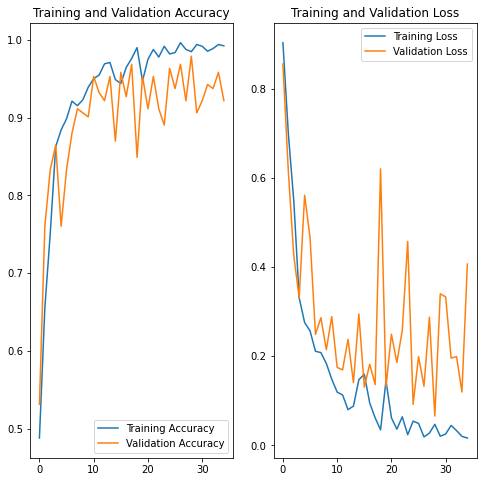

In [70]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


# Prediction on image

first image to predict
actual label: Potato___Late_blight
predicted label: Potato___Late_blight


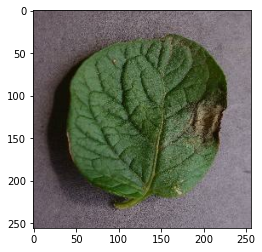

In [71]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

# Function for interference

In [72]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence


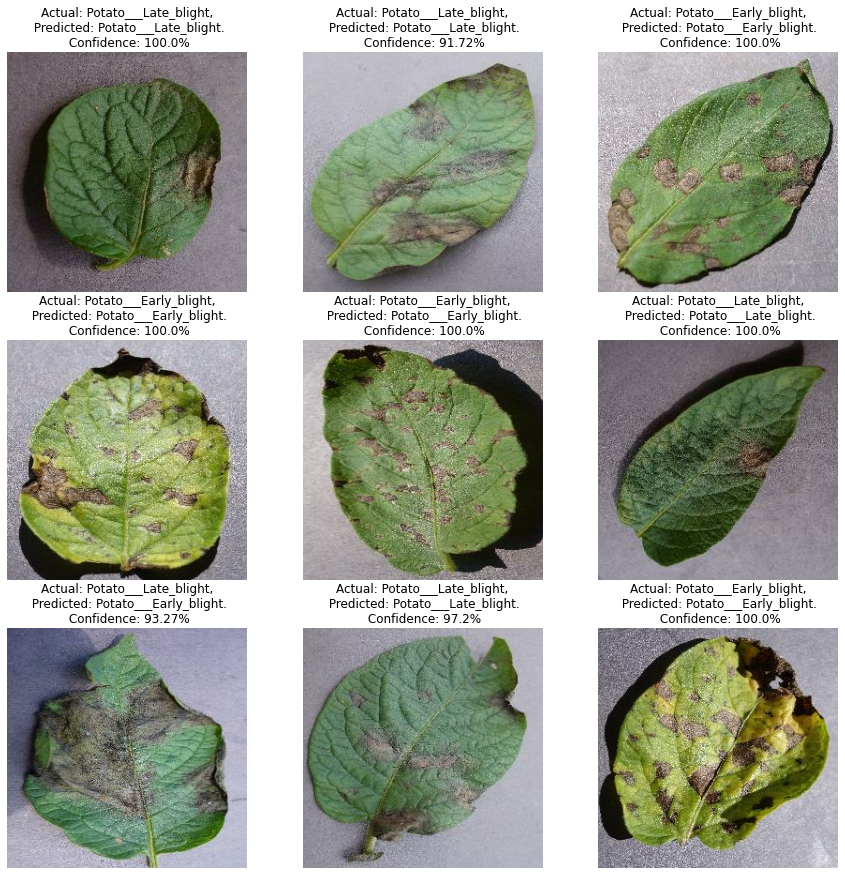

In [73]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(
            f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")


### Saving the Model
We append the model to the list of models as a new version

In [75]:
import os
model_version = max([int(i) for i in os.listdir("../models") + [0]])+1
model.save(f"../models/{model_version}")


INFO:tensorflow:Assets written to: ../models/1\assets


In [76]:
model.save("../potatoes.h5")
